### Install current build using pip (optional, if already installed)

In [1]:
import glob
import sys
import subprocess

# Find all .whl files in the dist directory
wheel_files = glob.glob('dist/*.whl')

if not wheel_files:
    print("No wheel files found in the 'dist' directory.")
else:
    for wheel_file in wheel_files:
        print(f"Installing {wheel_file}")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", wheel_file, "--force-reinstall"])
            print(f"Successfully installed {wheel_file}")
        except subprocess.CalledProcessError as e:
            print(f"An error occurred while installing {wheel_file}: {e}")

Installing dist\MyTorchCPP-0.1-cp312-cp312-win_amd64.whl


### Import Libraries

In [2]:
import numpy as np
from graphviz import Digraph
import MyTorch
import torch

initialization from list

In [3]:
data = [[0, 1],[2, 3]]
x_data = torch.tensor(data)
x_data

tensor([[0, 1],
        [2, 3]])

In [4]:
x_data.dtype

torch.int64

In [5]:
x_data_MT = MyTorch.Tensor(data)
x_data_MT

tensor([[0, 1], [2, 3]])

In [6]:
x_data_MT.dtype

<Dtype.Int64: 3>

initialization from numpy array

In [7]:
np_array = np.array([[1, 2],[3, 4]])
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [8]:
x_np_MT = MyTorch.from_numpy(np_array)
x_np_MT

tensor([[1, 2], [3, 4]])

In [9]:
x_np_MT.dtype

<Dtype.Int64: 3>

In [10]:
back_to_np = x_np.numpy()
back_to_np_MT = x_np_MT.numpy()

back_to_np, back_to_np_MT

(array([[1, 2],
        [3, 4]]),
 array([[1, 2],
        [3, 4]]))

In [11]:
torch_add_data = x_data + x_np
torch_add_data_scalar_int = x_data + 2
torch_add_data_scalar_float = x_data + 2.0
torch_sub_data = x_data - x_np
torch_sub_data_scalar_int = x_data - 2
torch_sub_data_scalar_float = x_data - 2.0
torch_mul_data = x_data * x_np
torch_mul_data_scalar_int = x_data * 2
torch_mul_data_scalar_float = x_data * 2.0
torch_div_data = x_data / x_np
torch_div_data_scalar_int = x_data / 2
torch_div_data_scalar_float = x_data / 2.0
torch_neg_data = -x_data
torch_dot_data = x_data @ x_np
torch_transpose_data = x_data.T

data_list = [torch_add_data, torch_sub_data, torch_mul_data, torch_div_data, torch_neg_data, torch_transpose_data]

print("Result of addition: \n", torch_add_data)
print("Result of subtraction: \n", torch_sub_data)
print("Result of negation: \n", torch_neg_data)
print("Result of multiplication: \n", torch_mul_data)
print("Result of dot product: \n", torch_dot_data)
print("Result of division: \n", torch_div_data)
print("Result of transpose: \n", torch_transpose_data)

Result of addition: 
 tensor([[1, 3],
        [5, 7]])
Result of subtraction: 
 tensor([[-1, -1],
        [-1, -1]])
Result of negation: 
 tensor([[ 0, -1],
        [-2, -3]])
Result of multiplication: 
 tensor([[ 0,  2],
        [ 6, 12]])
Result of dot product: 
 tensor([[ 3,  4],
        [11, 16]])
Result of division: 
 tensor([[0.0000, 0.5000],
        [0.6667, 0.7500]])
Result of transpose: 
 tensor([[0, 2],
        [1, 3]])


Division should always result in a float dtype, unless explicitly cast

In [12]:
for torch_data in data_list:
    print(torch_data.dtype)

torch.int64
torch.int64
torch.int64
torch.float32
torch.int64
torch.int64


In [13]:
add_data = x_data_MT + x_np_MT
add_data_scalar_int = x_data_MT + 2
add_data_scalar_float = x_data_MT + 2.0
sub_data = x_data_MT - x_np_MT
sub_data_scalar_int = x_data_MT - 2
sub_data_scalar_float = x_data_MT - 2.0
mul_data = x_data_MT * x_np_MT
mul_data_scalar_int = x_data_MT * 2
mul_data_scalar_float = x_data_MT * 2.0
div_data = x_data_MT / x_np_MT
div_data_scalar_int = x_data_MT / 2
div_data_scalar_float = x_data_MT / 2.0
neg_data = -x_data_MT
dot_data = x_data_MT.dot(x_np_MT)

transpose_data = x_data_MT.T

my_list = [add_data, sub_data, mul_data, div_data, neg_data, transpose_data]

print("Result of addition: ", add_data)
print("Result of subtraction: ", sub_data)
print("Result of negation: ", neg_data)
print("Result of multiplication: ", mul_data)
print("Result of dot product: ", dot_data)
print("Result of division: ", div_data)
print("Result of transpose: ", transpose_data)

Result of addition:  tensor([[1, 3], [5, 7]])
Result of subtraction:  tensor([[-1, -1], [-1, -1]])
Result of negation:  tensor([[0, -1], [-2, -3]])
Result of multiplication:  tensor([[0, 2], [6, 12]])
Result of dot product:  tensor([[3, 4], [11, 16]])
Result of division:  tensor([[0.0, 0.5], [0.7, 0.8]])
Result of transpose:  tensor([[0, 2], [1, 3]])


In [14]:
for my_data in my_list:
    print(my_data.dtype)

Dtype.Int64
Dtype.Int64
Dtype.Int64
Dtype.Float32
Dtype.Int64
Dtype.Int64


In [15]:
print("Result of addition with scalar int: \n", torch_add_data_scalar_int)
print("Result of addition with scalar float: \n", torch_add_data_scalar_float)
print("Result of subtraction with scalar int: \n", torch_sub_data_scalar_int)
print("Result of subtraction with scalar float: \n", torch_sub_data_scalar_float)
print("Result of multiplication with scalar int: \n", torch_mul_data_scalar_int)
print("Result of multiplication with scalar float: \n", torch_mul_data_scalar_float)
print("Result of division with scalar int: \n", torch_div_data_scalar_int)
print("Result of division with scalar float: \n", torch_div_data_scalar_float)

Result of addition with scalar int: 
 tensor([[2, 3],
        [4, 5]])
Result of addition with scalar float: 
 tensor([[2., 3.],
        [4., 5.]])
Result of subtraction with scalar int: 
 tensor([[-2, -1],
        [ 0,  1]])
Result of subtraction with scalar float: 
 tensor([[-2., -1.],
        [ 0.,  1.]])
Result of multiplication with scalar int: 
 tensor([[0, 2],
        [4, 6]])
Result of multiplication with scalar float: 
 tensor([[0., 2.],
        [4., 6.]])
Result of division with scalar int: 
 tensor([[0.0000, 0.5000],
        [1.0000, 1.5000]])
Result of division with scalar float: 
 tensor([[0.0000, 0.5000],
        [1.0000, 1.5000]])


In [16]:
print("Result of addition with scalar int:\n", add_data_scalar_int)
print("Result of addition with scalar float:\n", add_data_scalar_float)
print("Result of subtraction with scalar int:\n", sub_data_scalar_int)
print("Result of subtraction with scalar float:\n", sub_data_scalar_float)
print("Result of multiplication with scalar int:\n", mul_data_scalar_int)
print("Result of multiplication with scalar float:\n", mul_data_scalar_float)
print("Result of division with scalar int:\n", div_data_scalar_int)
print("Result of division with scalar float:\n", div_data_scalar_float)

Result of addition with scalar int:
 tensor([[2, 3], [4, 5]])
Result of addition with scalar float:
 tensor([[2.0, 3.0], [4.0, 5.0]])
Result of subtraction with scalar int:
 tensor([[-2, -1], [0, 1]])
Result of subtraction with scalar float:
 tensor([[-2.0, -1.0], [0.0, 1.0]])
Result of multiplication with scalar int:
 tensor([[0, 2], [4, 6]])
Result of multiplication with scalar float:
 tensor([[0.0, 2.0], [4.0, 6.0]])
Result of division with scalar int:
 tensor([[0, 0], [1, 1]])
Result of division with scalar float:
 tensor([[0.0, 0.5], [1.0, 1.5]])


In [20]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4407, 0.8270],
        [0.1381, 0.6187]]) 



In [21]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4838, 0.7977, 0.7223],
        [0.5413, 0.3393, 0.1572]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [22]:
rand_MyTensor = MyTorch.rand(shape)
ones_MyTensor = MyTorch.ones(shape)
zeros_MyTensor = MyTorch.zeros(shape)

print(f"Random Tensor: \n {rand_MyTensor} \n")
print(f"Ones Tensor: \n {ones_MyTensor} \n")
print(f"Zeros Tensor: \n {zeros_MyTensor} \n")

Random Tensor: 
 tensor([[0.7, 0.2, 0.7], [0.5, 0.0, 0.9]]) 

Ones Tensor: 
 tensor([[1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]) 

Zeros Tensor: 
 tensor([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]) 



In [23]:
# numpy array
test_data = MyTorch.Tensor([[1, 2], [3, 4]])  # 3x2 Matrix
test_data

tensor([[1, 2], [3, 4]])

In [24]:
test_ones = MyTorch.ones_like(test_data)
test_ones

tensor([[1.0, 1.0], [1.0, 1.0]])

In [25]:
test_rand = MyTorch.rand_like(test_data, dtype=MyTorch.Dtype.Float32)
test_rand

ValueError: Data type does not match dtype

Currently, indexing into tensor returns flattened index. This is not what we want, so TODO: make whole dimensions subscriptable

In [ ]:
x_data_MT[1]

1

In [12]:
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2) / 2

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [5]:
class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self.label = label
        self._backward = lambda: None

    def __repr__(self):
        return f"Value({self.data})"
    
    def __add__(self, other):
        if isinstance(other, (int, float)): other = Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += out.grad
            other.grad += out.grad

        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self.__add__(other)
    
    def __neg__(self):
        return Value(-self.data, (self,), 'neg')
    
    def __sub__(self, other):
        if isinstance(other, (int, float)): other = Value(other)
        out = Value(self.data - other.data, (self, other), '-')
        def _backward():
            self.grad += out.grad
            other.grad -= out.grad

        out._backward = _backward
        return out
    
    def __rsub__(self, other):
        return Value(other) - self
    
    def __mul__(self, other):
        if isinstance(other, (int, float)): other = Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        return self.__mul__(other)
    
    def __pow__(self, other):
        if isinstance(other, (int, float)): other = Value(other)
        out = Value(self.data ** other.data, (self, other), '**')
        def _backward():
            self.grad += other.data * (self.data ** (other.data - 1)) * out.grad
            other.grad += self.data ** other.data * np.log(np.abs(self.data) + 1e-8) * out.grad

        out._backward = _backward
        return out
    
    def __truediv__(self, other):
        if isinstance(other, (int, float)): other = Value(other)
        out = self * other ** -1.0
        return out

    def __rtruediv__(self, other):
        return Value(other) / self
    
    def exp(self):
        out = Value(np.exp(self.data), (self,), 'exp')
        def _backward():
            self.grad += np.exp(self.data) * out.grad

        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out
    
    def backward(self):

        self.grad = 1.0

        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        for node in reversed(topo):
            node._backward()

def trace(value):
    nodes, edges = set(), set()
    def build_trace(value):
        if value not in nodes:
            nodes.add(value)
            for prev in value._prev:
                edges.add((prev, value))
                build_trace(prev)
    build_trace(value)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='png', graph_attr={'rankdir': 'LR'}) # Left to Right
    nodes, edges = trace(root)
    for node in nodes:
        uid = str(id(node))
        dot.node(name=uid, label=f'{node.label}={node.data}\n{node._op}\ngrad={node.grad}')
        if node._op:
            for prev in node._prev:
                dot.edge(str(id(prev)), uid)

    dot.render('graph', cleanup=True)
    return dot

In [6]:
class Neuron:
    def __init__(self, n_inputs):
        self.weights = [Value(np.random.randn(), label=f'w{i}') for i in range(n_inputs)]
        self.bias = Value(np.random.randn(), label='b')
        self.params = self.weights + [self.bias]
    
    def forward(self, inputs):
        act = self.bias
        for x, w in zip(inputs, self.weights):
            if not isinstance(x, Value):
                x = Value(x)  # Convert to Value if necessary
            act += x * w  # Correctly accumulate using Value object
        out = act.tanh()  # Activation function
        return out
    
    def __repr__(self):
        return f"Neuron({[w.data for w in self.weights]}, {self.bias.data})"
    
class Layer:
    def __init__(self, n_inputs, n_neurons):
        self.neurons = [Neuron(n_inputs) for _ in range(n_neurons)]
        self.params = [param for neuron in self.neurons for param in neuron.params]
    
    def forward(self, inputs):
        outs = [neuron.forward(inputs) for neuron in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def __repr__(self):
        return f"Layer({self.neurons})"
    
class MLP:
    def __init__(self, n_inputs, n_outputs):
        sz = [n_inputs] + n_outputs
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(n_outputs))]
        self.params = [param for layer in self.layers for param in layer.params]

    def __call__(self, inputs):
        for layer in self.layers:
            inputs = layer.forward(inputs)
        return inputs
    
    def __repr__(self):
        out = "MLP("
        for layer in self.layers:
            out += f"{layer},\n"
        return out + ")"
    

mlp = MLP(n_inputs=2, n_outputs=[1]) # 2 inputs, 1 output. single layer
print(mlp)

MLP(Layer([Neuron([1.12653665970634, 0.6602045233092891], 0.7400061290435678)]),
)


In [7]:
mlp.params

[Value(1.12653665970634), Value(0.6602045233092891), Value(0.7400061290435678)]

In [8]:
X = Tensor(np.array([[0, 1, 1, 0], [0, 0, 1, 1]]))
y = Tensor(np.array([0, 1, 0, 1]))
X_val = Value(X, label='Input')
y_val = Value(y, label='Target')
X_val.data, y_val.data

(<MyTensor.Tensor at 0x7564da5c1ab0>, <MyTensor.Tensor at 0x7564d8651130>)

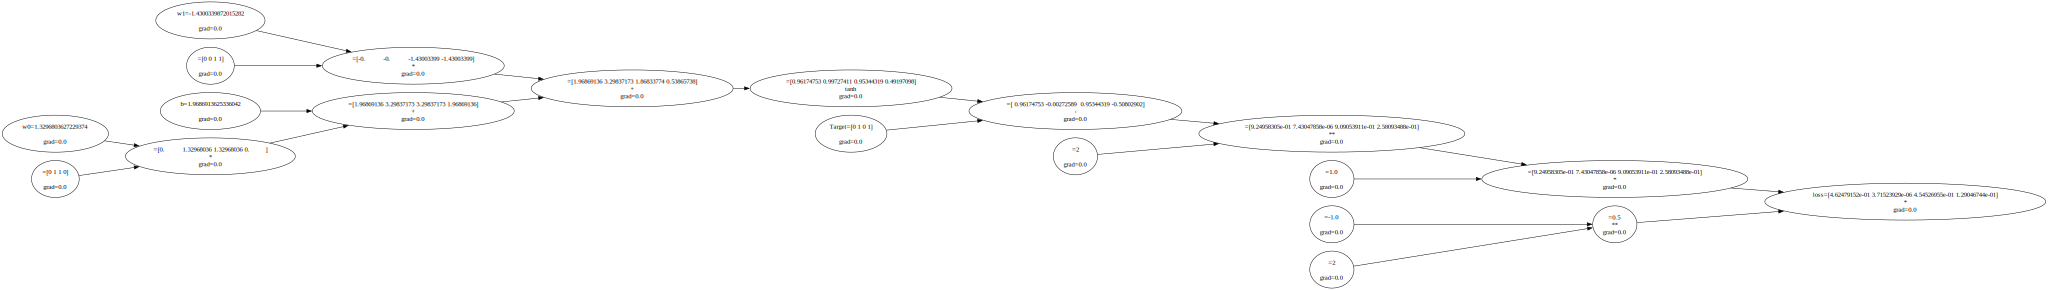

In [17]:
output = mlp(X.data)
loss = mse(output, y); loss.label = 'loss'
draw_dot(loss)

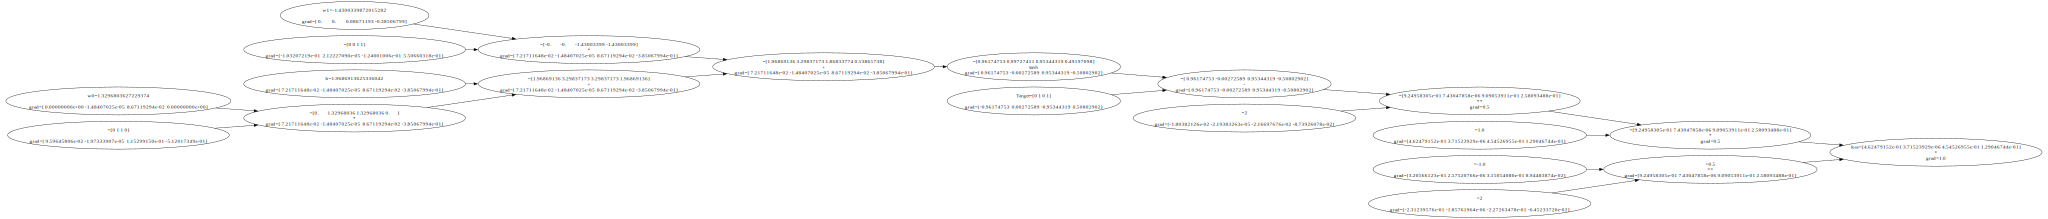

In [18]:
loss.backward()
draw_dot(loss)

Forward Pass

In [22]:
def gradient_descent(model, X, y, lr=0.01, n_epochs=10):
    for _ in range(n_epochs):
        for param in model.params:
            param.grad = 0.0
        output = model(X.data)
        loss = mse(output, y); loss.label = 'loss'
        loss.backward()
        for param in model.params:
            param.data -= lr * param.grad

        print(loss.data.mean())

    return model

mlp = MLP(n_inputs=2, n_outputs=[1])
mlp = gradient_descent(mlp, X, y, lr=0.01, n_epochs=1000)

0.740539907653194
0.7298218394546663
0.7187978974552685
0.7074702479871268
0.6958432199190573
0.6839234858692259
0.6717202212240156
0.6592452333332182
0.6465130532808437
0.6335409830811394
0.6203490920555621
0.6069601575049889
0.5933995465543964
0.5796950381221924
0.5658765862236204
0.5519760281046675
0.5380267428640013
0.524063268118046
0.5101208837970086
0.4962351732728624
0.48244157270645427
0.46877491978933983
0.45526901299521255
0.4419561920939511
0.4288669500501918
0.41602958553684244
0.4034699041323174
0.3912109748239171
0.3792729467079159
0.3676729287897968
0.3564249336168617
0.34553988323162
0.3350256737580126
0.3248872929730018
0.31512698360941294
0.30574444398497147
0.29673705691329366
0.28810013772979826
0.2798271926161351
0.2719101791507762
0.26433976204797743
0.2571055582614811
0.2501963669171018
0.24360038080825086
0.23730537736925034
0.2312988880837697
0.2255683461618924
0.22010121301926955
0.21488508461987302
0.20990777911426575
0.20515740743838712
0.20062242865672683


In [23]:
print(mlp(X.data).data)

[-2.01602688e-04  9.12173112e-01 -1.38777878e-14  9.12613259e-01]


In [21]:
y

Value([0 1 0 1])